In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, GlobalMaxPooling2D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import ZeroPadding2D
from keras.optimizers import SGD

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.vgg16 import VGG16

from sklearn.model_selection import train_test_split

import numpy as np
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [55]:
input_shape_1d = (48, 48, 3)
nb_classes = 3

model = Sequential([
    # block 1
    Conv2D(64, (3, 3), input_shape=input_shape_1d, padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    # block 2
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    # block 3
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    # block 4
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    # block 5
#     Conv2D(512, (3, 3), activation='relu', padding='same',),
#     Conv2D(512, (3, 3), activation='relu', padding='same',),
#     Conv2D(512, (3, 3), activation='relu', padding='same',),
#     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    # top 
    #Flatten(),
    GlobalMaxPooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    #Dense(256, activation='relu'),
    Dense(nb_classes, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 12, 12, 256)       295168    
__________

In [3]:
################# JUNK YARD #################

# split up - setup indexing and do the split
# train_labels = labels[:nb_training_samples]
# test_labels = labels[nb_training_samples:nb_total_data]
        
# convert to keras friendy format
# train_labels = keras.utils.to_categorical(train_labels, num_classes=nb_classes)
# test_labels = keras.utils.to_categorical(test_labels, num_classes=nb_classes)

# just for testing on all data...is that a thing?
#labels = keras.utils.to_categorical(labels, num_classes=nb_classes)

In [4]:
import pandas as pd
import scipy.misc

# some constants

# data directories
train_dir = '../../input'
images_csv = train_dir+'/train_data.csv'
labels_csv = train_dir+'/train_target.csv'
train_images_dir = train_dir+'/train_imgs'

# array of 16.2k 48x48 image arrays
nb_total_data = 16175
img_wh = 48
nb_classes = 3

In [5]:
import os
os.listdir(train_dir)

['test_data.csv',
 'train_imgs',
 'train_target.csv',
 'sample-submission.csv',
 'train_data.csv']

In [6]:
################# READ IN CLASS LABELS #################

labels_df = pd.read_csv(labels_csv, header=None)
labels = np.zeros((nb_total_data,), dtype='object')

# iterate over rows and reshape as 2304x1 array to 48x48 array
for i, row in labels_df.iterrows():
    labels[i] = str(row[0])

print(labels.shape)
for i in range(15):
    print(labels[i], 'type: ', type(labels[i]))

(16175,)
1 type:  <class 'str'>
1 type:  <class 'str'>
0 type:  <class 'str'>
1 type:  <class 'str'>
1 type:  <class 'str'>
2 type:  <class 'str'>
0 type:  <class 'str'>
1 type:  <class 'str'>
1 type:  <class 'str'>
0 type:  <class 'str'>
1 type:  <class 'str'>
2 type:  <class 'str'>
2 type:  <class 'str'>
2 type:  <class 'str'>
0 type:  <class 'str'>


In [10]:
################# SAVE CSV ARRAYS TO IMAGES #################

# read csv
images_df = pd.read_csv(images_csv, header=None)

# make sure file name and class label matches up, os.listdir was giving issues
filenames = []

# iterate over rows and reshape as 2304x1 array to 48x48 array
for i, row in images_df.iterrows():
    img = np.asarray(row).reshape((48,48))
    filename = labels[i]+'.'+str(i)+'.jpg'
    filenames.append(filename)
    save_dir_filename = train_images_dir+'/'+filename
    scipy.misc.imsave(save_dir_filename, img)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  from ipykernel import kernelapp as app


In [42]:
images_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,146,146,145,145,145,142,140,114,126,128,...,103,103,93,87,73,65,65,76,85,81
1,9,12,34,72,98,110,113,116,126,134,...,141,121,131,118,93,74,31,7,4,9
2,255,129,62,59,45,31,29,26,32,23,...,122,130,138,113,43,26,16,12,14,16
3,217,191,222,176,150,201,157,72,59,74,...,223,229,114,70,111,95,71,109,159,191
4,19,11,4,37,62,78,98,113,121,126,...,152,149,156,161,160,158,160,177,187,181


In [12]:
# testing no split
df = pd.DataFrame({
    'filename': filenames,
    'category': labels
})

for i in range(15):
    print(labels[i])    
df.head()

1
1
0
1
1
2
0
1
1
0
1
2
2
2
0


,category,filename
0,1,1.0.jpg
1,1,1.1.jpg
2,0,0.2.jpg
3,1,1.3.jpg
4,1,1.4.jpg


In [13]:
print(len(filenames))
print(labels.shape)

16175
(16175,)


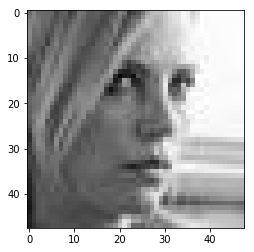

In [56]:
sample = random.choice(filenames)
image = load_img(train_images_dir+'/'+sample)
plt.imshow(image)

In [30]:
# split train/test
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)        # remove index column
validate_df = validate_df.reset_index(drop=True)  # remove index column

In [57]:
total_train = train_df.shape[0]        # get the total number of training images
total_validate = validate_df.shape[0]  # get the total number of validation images

print(total_train)                     # print number of training images
print(total_validate)                  # print number of validation images

12940
3235


In [63]:
train_datagen = ImageDataGenerator(  # generates images with augmentations specified below
    rotation_range=15,               # rotate image 15 degrees
    rescale=1./255,                  # target values between 0 and 1
    shear_range=0.1,                 # counter-clockwise rotation
    zoom_range=0.2,                  # zoom into image
    horizontal_flip=True,            # allow horizontal flip
    width_shift_range=0.1,           # shift width
    height_shift_range=0.1           # shift height
)

# parameters
flow_training_dir = train_images_dir+'/' # directory to flow images from
img_dim = (img_wh, img_wh)           # set image dimensions without channels
batch_size = 15                      # number of images to feed model at a time

# create the image flow for training
train_generator = train_datagen.flow_from_dataframe(
    train_df,                        # dataframe of images and labels
    flow_training_dir,               # directory to flow from
    x_col='filename',                # specifying name of image identifier in dataframe
    y_col='category',                # specifying name of label identifier in dataframe
    target_size=img_dim,             # image dimensions without channels
    batch_size=batch_size            # number of images to process at a time
)

Found 12940 images belonging to 3 classes.


In [64]:
image_gen = ImageDataGenerator(
    width_shift_range=0.15,
    height_shift_range=0.15,
    rotation_range=20,
    shear_range=0.01,
    zoom_range=[.9, 1.2],
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='reflect'
)

In [65]:
validation_datagen = ImageDataGenerator(rescale=1./255)  # target values between 0 and 1

# create image flow for validation
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,                     # datagframe of images and labels
    flow_training_dir,               # directory to flow from
    x_col='filename',                # specifying name of image identifier in dataframe
    y_col='category',                # specifying name of label identifier in dataframe
    target_size=img_dim,             # image dimensions without channels
    batch_size=batch_size            # number of images to process at a time
)

Found 3235 images belonging to 3 classes.


In [72]:
sgd = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

nb_epochs = 50
history = model.fit_generator(                     # start fitting the data!
    train_generator,                               # training image data generator
    epochs=nb_epochs,                              # number of iterations
    validation_data=validation_generator,          # validation image data generator
    validation_steps=total_validate//batch_size,   # number of validation steps
    steps_per_epoch=100 #total_train//batch_size        # number of steps per epoch
)

Epoch 1/50
100/100 [==============================] - 9s 91ms/step - loss: 0.4707 - acc: 0.8080 - val_loss: 0.5276 - val_acc: 0.7988
Epoch 2/50
100/100 [==============================] - 7s 74ms/step - loss: 0.4935 - acc: 0.8040 - val_loss: 0.4890 - val_acc: 0.8090
Epoch 3/50
100/100 [==============================] - 7s 74ms/step - loss: 0.5064 - acc: 0.8053 - val_loss: 0.5195 - val_acc: 0.7966
Epoch 4/50
100/100 [==============================] - 7s 75ms/step - loss: 0.5198 - acc: 0.7980 - val_loss: 0.5288 - val_acc: 0.7826
Epoch 5/50
100/100 [==============================] - 7s 74ms/step - loss: 0.4936 - acc: 0.8073 - val_loss: 0.5665 - val_acc: 0.7804
Epoch 6/50
100/100 [==============================] - 7s 74ms/step - loss: 0.5038 - acc: 0.8007 - val_loss: 0.5324 - val_acc: 0.7845
Epoch 7/50
100/100 [==============================] - 7s 74ms/step - loss: 0.4568 - acc: 0.8180 - val_loss: 0.4995 - val_acc: 0.8062
Epoch 8/50
100/100 [==============================] - 7s 74ms/step - 

In [73]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.820186  ;  loss = 0.475731 


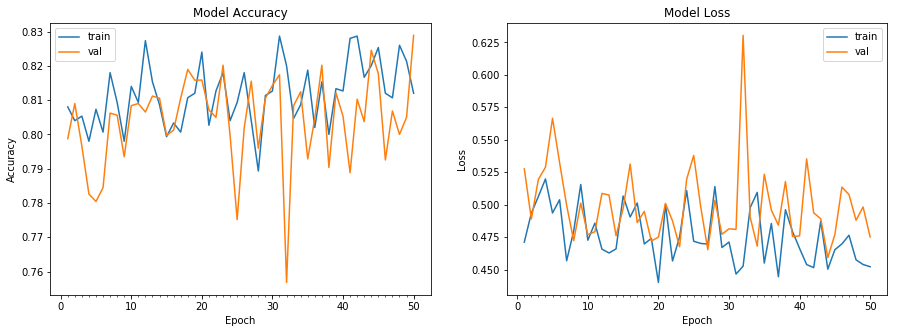

In [74]:
def plot_model_history(model_history, acc='acc', val_acc='val_acc'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(history)

In [ ]:
model.save_weights('lr.01_decay1e-6_mom.9_batch32_epocs20_score.871535.h5')